In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.dates as mdates
#import plotly.express as px
import numpy as np
#import idx2numpy
#from datetime import timedelta (uncomment if you want to see actual time)
import csv
import random
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

In [2]:
#read all the data needed
#weather = pd.read_csv("Weather July 2021-2022.csv")
#q_train = pd.read_csv("Q Train Timetable Sample.csv")


#originally planned to use weather data but seems impossible in this context
with open('Weather July 2021-2022.csv', newline='') as csvfile:
    weather = list(csv.reader(csvfile))

with open('Q Train Timetable Sample 2.csv', newline='') as csvfile:
    q_train = list(csv.reader(csvfile))    

#feel free to uncomment some of these lines; used as a personal check to make sure these files are opened right

for i in q_train:
    print(i)

#for i in weather:
#    print(i[1:len(i)])

#print(weather)
#print(q_train)

['1', '1', '1', '2', '2', '2', '2', '2', '2', '2']
['41', '46', '53', '6', '13', '21', '29', '35', '39', '47']
['2', '2', '2', '2', '2', '2', '2', '2', '2', '3']
['1', '6', '13', '26', '33', '41', '49', '55', '59', '7']
['2', '2', '2', '2', '2', '3', '3', '3', '3', '3']
['21', '26', '33', '46', '53', '1', '9', '15', '19', '27']
['2', '2', '2', '3', '3', '3', '3', '3', '3', '3']
['41', '46', '53', '6', '13', '21', '29', '35', '39', '47']
['3', '3', '3', '3', '3', '3', '3', '3', '3', '4']
['1', '6', '13', '26', '33', '41', '49', '55', '59', '7']


In [122]:
#creating time list

#checks to make sure that time works the way I want it to
counter = 0
hours = []
minutes = []
while counter < 10:
    if counter % 2 == 0:
        hours += q_train[counter]
        counter += 1
    else:
        minutes += q_train[counter]
        counter += 1

hours_to_minutes = [str(int(i) * 60) for i in hours]     
print(hours_to_minutes)  
print(minutes)
print(len(hours_to_minutes))
print(len(minutes))

'''
times = []
counter = 0
while counter < len(hours):
    time1 = timedelta(hours = int(hours[counter]), minutes = int(minutes[counter]))
    print(time1)
    counter += 1
    if counter % 10 == 0:
        print('End of timeset')
'''


time_sum = []
counter = 0
counter2 = 1
while counter < len(hours_to_minutes) and counter2 < len(hours_to_minutes) + 1:
    time = int(hours_to_minutes[counter]) + int(minutes[counter])
    time2 = int(hours_to_minutes[counter2]) + int(minutes[counter2])
    time_sum.append(time)
    time_sum.append(time2)
    counter += 2
    counter2 += 2
    #if counter % 10 == 0 and counter2 % 11 == 0:
    #    counter += 2
    #    counter2 += 2
        

print(time_sum)

#based on the given data, this will return the same result every time but hypothetically, if the input was very different, the wait times that are returned could be different
#this shouldn't be a problem based on the MTA timetables
time_difference = []
small_difference = []
counter = 0
while counter < len(time_sum) - 1:
    small_difference.append(time_sum[counter+1]-time_sum[counter])
    counter += 1
    if counter % 10 == 0:
        small_difference.pop(9)
        time_difference.append(small_difference)
        small_difference = []

print(time_difference)

for i in time_difference:
    print(sum(i))


['60', '60', '60', '120', '120', '120', '120', '120', '120', '120', '120', '120', '120', '120', '120', '120', '120', '120', '120', '180', '120', '120', '120', '120', '120', '180', '180', '180', '180', '180', '120', '120', '120', '180', '180', '180', '180', '180', '180', '180', '180', '180', '180', '180', '180', '180', '180', '180', '180', '240']
['41', '46', '53', '6', '13', '21', '29', '35', '39', '47', '1', '6', '13', '26', '33', '41', '49', '55', '59', '7', '21', '26', '33', '46', '53', '1', '9', '15', '19', '27', '41', '46', '53', '6', '13', '21', '29', '35', '39', '47', '1', '6', '13', '26', '33', '41', '49', '55', '59', '7']
50
50
[101, 106, 113, 126, 133, 141, 149, 155, 159, 167, 121, 126, 133, 146, 153, 161, 169, 175, 179, 187, 141, 146, 153, 166, 173, 181, 189, 195, 199, 207, 161, 166, 173, 186, 193, 201, 209, 215, 219, 227, 181, 186, 193, 206, 213, 221, 229, 235, 239, 247]
[[5, 7, 13, 7, 8, 8, 6, 4, 8], [5, 7, 13, 7, 8, 8, 6, 4, 8], [5, 7, 13, 7, 8, 8, 6, 4, 8], [5, 7, 13, 7,

In [145]:
#creating the delays
#random time model

#this code only shows data for a certain timeframe but you can just reuse the code and change numbers as given below

'''
Scheduled amount of trips vs on time vs delivered vs #delays (scheduled amount x (1-on time)) vs #major delays
Jul 2021 - 6891 75% 88.2% 1723 1
Aug 2021 - 6923 70.8% 85.4% 2022 2
Sep 2021 - 6357 70.8% 87.1% 1856 3
Oct 2021 - 6615 76% 84.6% 1589
Nov 2021 - 6615 75.9% 84.7% 1594
Dec 2021 - 6615 72.6% 82% 1813
Jan 2022 - 6630 76.5% 91.5% 1558 2
Feb 2022 - 5977 76.1% 92.3% 1429 2
March 2022 - 7241 75.7% 93.8% 1760 3
April 2022 - 6615 79% 92% 1390 
May 2022 - 6891 77.2% 91.8% 1571 1
June 2022 - 7496 77.3% 92.3% 1701
July 2022 - 6853 72.8% 90.8% 1864 3

#benchmarks for reference based on the comptroller data, in pseudocode
def major_delay1(N):
    Times2 = Times * 2

def major_delay2(N):
    Times2 = Times * 3

def major_delay3(N):
    Times2 = Times * 4
    
def meme_delay4(N)
    Times2 = Times * 8 (in reference to an 800% analysis requested during my presentation)

def minor_delay1(N):
    Times2 = Times * 1.375

def minor_delay2(N):
    Times2 = Times * 1.5
'''

delays = []
delay_section = []
multipliers = [1.375, 1.5, 2,3,4,8]
for i in multipliers:
    for j in time_difference:
        for k in j:
            delay_section.append(k*i)
            if len(delay_section) == len(j):
                delays.append(delay_section)
                delay_section = []

for i in delays:
    print(i)


#july 2021 random delays
#code essentially repeatable for other months based on data above
counter = 0
real_delays = []
total_delays = []
while counter <= 1723:
    for i in delays:
        for j in i:
            for k in time_difference:
                for l in k:
                    real_delays.append(random.uniform(l,j))
                    counter += 1
                    if len(real_delays) == len(i):
                        total_delays.append(real_delays)
                        real_delays = []

    
#this might take a while to run if uncommented
#for i in total_delays:
#    print(i)



[6.875, 9.625, 17.875, 9.625, 11.0, 11.0, 8.25, 5.5, 11.0]
[6.875, 9.625, 17.875, 9.625, 11.0, 11.0, 8.25, 5.5, 11.0]
[6.875, 9.625, 17.875, 9.625, 11.0, 11.0, 8.25, 5.5, 11.0]
[6.875, 9.625, 17.875, 9.625, 11.0, 11.0, 8.25, 5.5, 11.0]
[7.5, 10.5, 19.5, 10.5, 12.0, 12.0, 9.0, 6.0, 12.0]
[7.5, 10.5, 19.5, 10.5, 12.0, 12.0, 9.0, 6.0, 12.0]
[7.5, 10.5, 19.5, 10.5, 12.0, 12.0, 9.0, 6.0, 12.0]
[7.5, 10.5, 19.5, 10.5, 12.0, 12.0, 9.0, 6.0, 12.0]
[10, 14, 26, 14, 16, 16, 12, 8, 16]
[10, 14, 26, 14, 16, 16, 12, 8, 16]
[10, 14, 26, 14, 16, 16, 12, 8, 16]
[10, 14, 26, 14, 16, 16, 12, 8, 16]
[15, 21, 39, 21, 24, 24, 18, 12, 24]
[15, 21, 39, 21, 24, 24, 18, 12, 24]
[15, 21, 39, 21, 24, 24, 18, 12, 24]
[15, 21, 39, 21, 24, 24, 18, 12, 24]
[20, 28, 52, 28, 32, 32, 24, 16, 32]
[20, 28, 52, 28, 32, 32, 24, 16, 32]
[20, 28, 52, 28, 32, 32, 24, 16, 32]
[20, 28, 52, 28, 32, 32, 24, 16, 32]
[40, 56, 104, 56, 64, 64, 48, 32, 64]
[40, 56, 104, 56, 64, 64, 48, 32, 64]
[40, 56, 104, 56, 64, 64, 48, 32, 64]
[4

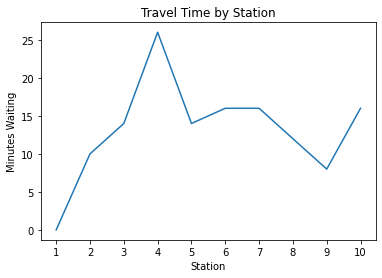

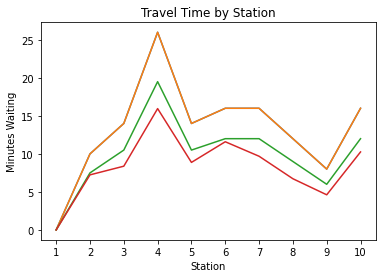

In [93]:
#plots of random time

#'x' values will be the stations by order

plt.xlabel('Station')
plt.ylabel('Minutes Waiting')
plt.title('Travel Time by Station')
x = ['1','2','3','4','5','6','7','8','9','10']
y = [0]+delays[0] #normal ride times
plt.plot(x,y)
plt.show()

plt.xlabel('Station')
plt.ylabel('Minutes Waiting')
plt.title('Travel Time by Station')
x = ['1','2','3','4','5','6','7','8','9','10']
y = [0]+delays[0]
#NewMin2 is a sample delay generated from above code
NewMin2 = [0, 7.242192489297619, 8.382970943171866, 15.956681577289478, 8.880177187061781, 11.596889255707318, 9.68914160733408, 6.7313234051798165, 4.618815945981584, 10.255136856208061]
plt.plot(x,y)
plt.plot(x,Maj2)
#plt.plot(x,Min1)
plt.plot(x,Min2)
plt.plot(x,NewMin2)
plt.show()

#as one can see, there are problems with the 'random time approach'

[24.75, 33.0, 66, 132, 198, 462]


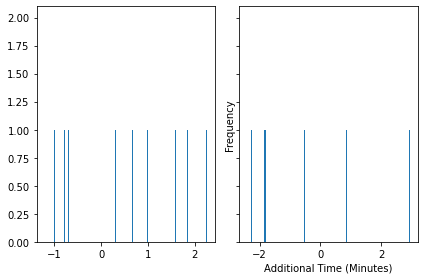

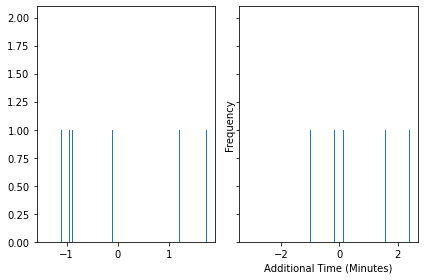

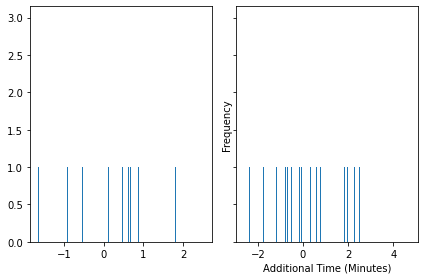

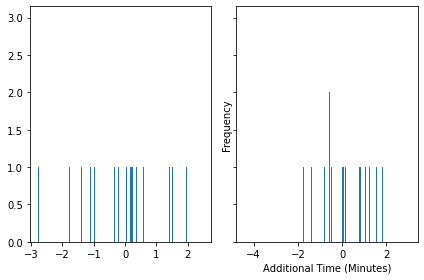

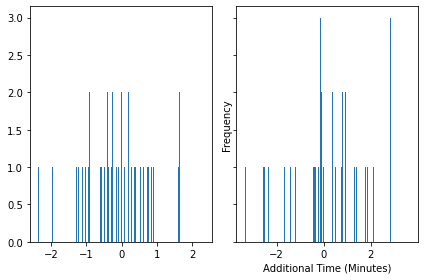

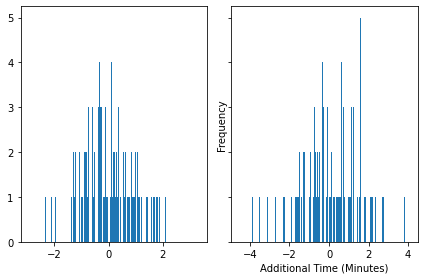

In [173]:
#probability distribution model
#idea: make the train delays appear more cummulative

'''
unlike the random delay model, this will be analyzed for the ENTIRE year rather than month by month
87719 scheduled, 21870 delayed, 25% delays in total, 65849 delayed in total
for specific rate of delay benchmarks themselves, I was unable to find any data other than how many delays occured in total
based on data from above, major delays are very, very, very rare in the grand scheme of things so they should be negligible
also, 65849 delays will dwarf the actual delay data
the code also BREAKS at such a high bin amount so lower amounts will be used (thinking of 877 scheduled, 218 delayed, 658 normal in total)
'''


#the result of this list should be the difference of the expected total travel time and the delayed benchmark travel time in minutes.
total_delay_time = []
counter = 0
while counter < len(delays):
    if counter % 4 == 0:
        total_delay_time.append(sum(delays[counter])-66)
        counter += 1
    else:
        counter += 1

print(total_delay_time)


#trips can be changed based on month you want to analyze
trips=218
for i in total_delay_time:
    x=np.random.randn(int(i))
    y=x+np.random.randn(int(i))
    fig,axs=plt.subplots(1,2, sharey=True,tight_layout=True)
    axs[0].hist(x,bins=n_bins)
    axs[1].hist(y,bins=n_bins)
    plt.xlabel('Additional Time (Minutes)')
    plt.ylabel('Frequency')
    plt.show()